#[실전예제-미디어] - 유튜브 인기 채널 및 영상 분석

# 인기 채널 순위 시각화 - 환경 설정 (라이브러리, 폰트, 데이터)

###1. 한글 폰트 설치 및 적용

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fonm



mpl.rcParams['font.family'] = 'MaruBuri-Regular'
mpl.rcParams['font.size'] = 10

print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

['MaruBuri-Regular']
10.0


###2. 한글 폰트 설치 테스트

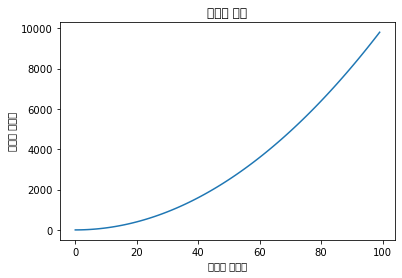

In [23]:
def example_f(x):
    return x**2

x = np.arange(0,100,1)
plt.xlabel('이것은 엑스축')
plt.ylabel('이것은 와이축')
plt.title('이것은 제목')
plt.plot(x, example_f(x))

###3. Warning 출력 무시

In [24]:
import warnings
warnings.filterwarnings(action='ignore')

###4. 라이브러리 import

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns


###5. 데이터 가져오기 Drag & Drop

In [27]:
# kaggle trending youtube video statistics


['CA_category_id.json', 'CAvideos.csv', 'DE_category_id.json', 'DEvideos.csv', 'FR_category_id.json', 'FRvideos.csv', 'GB_category_id.json', 'GBvideos.csv', 'IN_category_id.json', 'INvideos.csv', 'JP_category_id.json', 'JPvideos.csv', 'KR_category_id.json', 'KRvideos.csv', 'MX_category_id.json', 'MXvideos.csv', 'RU_category_id.json', 'RUvideos.csv', 'US_category_id.json', 'USvideos.csv']


ValueError: Attempt to use ZIP archive that was already closed

# 인기 채널 순위 시각화 - 데이터 구조 파악 및 정리

## 데이터 불러오기

###1. pandas로 데이터 불러오기 (engine="python", error_bad_lines="false")

In [33]:
import zipfile
with zipfile.ZipFile('archive.zip') as z:
    print(z.namelist())
    df = pd.read_csv(z.open('KRvideos.csv'),engine="python", error_bad_lines=True, encoding_errors='ignore')

['CA_category_id.json', 'CAvideos.csv', 'DE_category_id.json', 'DEvideos.csv', 'FR_category_id.json', 'FRvideos.csv', 'GB_category_id.json', 'GBvideos.csv', 'IN_category_id.json', 'INvideos.csv', 'JP_category_id.json', 'JPvideos.csv', 'KR_category_id.json', 'KRvideos.csv', 'MX_category_id.json', 'MXvideos.csv', 'RU_category_id.json', 'RUvideos.csv', 'US_category_id.json', 'USvideos.csv']


## 데이터 구조 파악하기

###1. row, column 수 파악하기

In [36]:
df.shape

(34567, 16)

###2. 결측 값 확인

In [39]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

###3. 전체 데이터 구조 파악하기

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

## 데이터 정리하기

###1. 필요한 칼럼만 추리기



In [41]:
df[['tags','views']]

,tags,views
0,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130
1,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533
2,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409
3,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850
4,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466
...,...,...
34562,[none],156439
34563,[none],130948
34564,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555
34565,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306


###2. view 내림차순 정렬 하기

In [42]:
df.sort_values('views',ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4856,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811223,1470388,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4678,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656686,1353663,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4018,6ZfuNTqbHE8,17.06.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
30844,7C2z4GqqS5E,18.24.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150839,172570,1142274,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
3750,6ZfuNTqbHE8,17.05.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555414,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,xzrwNEV_8Gg,17.11.12,다니엘 생일 축하해!,여름감기 from OSW,22,2017-12-10T12:20:41.000Z,"kangdaniel|""daniel""|""다녤""|""fanmade""|""데뷔전""|""pre-...",3268,333,0,10,https://i.ytimg.com/vi/xzrwNEV_8Gg/default.jpg,False,False,False,※재업로드 하지마세요! Do not Re-upload※\n※재편집 하지마세요! Do...
18568,Pj-QWzy4PsQ,18.06.03,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,25,2018-03-05T20:31:15.000Z,"정법|""정법강의""|""진정스승님""|""즉문즉설""|""천부경""|""정법시대""|""정법클럽""|""...",3124,0,0,0,https://i.ytimg.com/vi/Pj-QWzy4PsQ/default.jpg,True,True,False,질문 : 먼저 공도 사상에 뿌리 된 공적인 삶과 또 제 신을 제 수준만큼 이해할 수...
17414,3cdfrhklH_8,18.27.02,애슐리 18년도 딸기축제 영상❣,ashley wow,24,2018-02-27T00:57:01.000Z,[none],2919,10,4,1,https://i.ytimg.com/vi/3cdfrhklH_8/default.jpg,False,False,False,딸기 신메뉴가 13종!\n산처럼 쌓인 신선한 생딸기!\n애슐리의 봄은 생딸기 인가 봄❣
509,vWkMCsWwHYU,17.16.11,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,22,2017-11-15T07:54:36.000Z,"일상브이로그|""일상""|""브이로그""|""만취브이로그""|""만취""|""현실술판""|""혼술""|""...",2623,8,0,25,https://i.ytimg.com/vi/vWkMCsWwHYU/default.jpg,False,False,False,#일상브이로그\n.\n.\n#만취_브이로그\n#서프라이즈_생일파티\n#실시간_현실_...


###3. 중복 제거 (MAX만 남김)

In [45]:
df.drop_duplicates(keep='first')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...


###4. 중복된 row는 몇개였을까?

In [48]:
df.duplicated(['views'])

0        False
1        False
2        False
3        False
4        False
         ...  
34562    False
34563    False
34564    False
34565     True
34566    False
Length: 34567, dtype: bool

###5. 중복 제거된 것 확인하기

In [53]:
# 질문
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요


# 인기 채널 순위 시각화 - seaborn을 활용한 데이터 시각화

##1. 조회수 기준 TOP 100 채널 순위 조회

####채널별 조회수 합계

In [ ]:
sns.countplot(x="channel_title",y="views",data=df)
plt.show()

####정렬

###TOP 100만 뽑기

###reset_index()

##2. seaborn barplot 사용하여 TOP 100 채널 데이터 시각화

##3. 사이즈 (20*100) 및 축 조정

# 인기 영상 키워드 분석하기 - 제목 추출 및 정제하기

###1. 데이터 조회

###2. 제목, 뷰만 가져오고 뷰 많은 순으로 정렬 후 중복 제거

###3. 제목 Array로 조회

###4. 정규표현식(re)로 한글 데이터만 남기기 (한글,띄어쓰기 포함)

###5. 공백만 있는 row는 삭제

# 인기 영상 키워드 분석하기 - 제목 단어 추출 및 빈도 수 구하기

###1. soynlp 설치

###2. WordExtractor로 단어 점수 학습

###3. LTokenizer로 L-R 분리

###4. 제목 데이터 중 L만 남기기

# 인기 영상 키워드 분석하기 - 단어 빈도 수 구하기

###1. 인기 영상 (50만 조회수 이상)

###2. tokenized 단어 한 배열에 담기

### Counter로 words 빈도 수 파악하기

# 인기 영상 키워드 분석하기 - 워드 클라우드 그리기

### wordcloud 폰트 설정 및 생성하기

In [0]:
with open('대한민국헌법.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 word

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Collecting wordcloud
  Using cached wordcloud-1.8.1.tar.gz (220 kB)

  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\sim\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sim\\AppData\\Local\\Temp\\pip-install-22wuzvcc\\wordcloud_fd3459d3cd474d85bbd43c2bdd7a0082\\setup.py'"'"'; __file__='"'"'C:\\Users\\sim\\AppData\\Local\\Temp\\pip-install-22wuzvcc\\wordcloud_fd3459d3cd474d85bbd43c2bdd7a0082\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\sim\AppData\Local\Temp\pip-wheel-p48plz6m'
       cwd: C:\Users\sim\AppData\Local\Temp\pip-install-22wuzvcc\wordcloud_fd3459d3cd474d85bbd43c2bdd7a0082\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creatin

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

ModuleNotFoundError: No module named 'wordcloud'

In [0]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

### StopWord 설정 후 다시 보기